# 1. Problem Statement
> We have a dataset with records of doctor's important details should build  the model for predicting the doctor fee

# 2. Data
> we have two datasets 
> * Link :https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects
        
* Training set : 5961 records
* Test set : 1987 records
    
# 3. Evaluation

> If we reach the r2score above 80 we will continue with this project.

# 4. Features

* 1. Qualification: Qualification and degree held by the doctor
* 2. Experience :Experience of the doctor in number of years
* 3. Rating : Rating given by patients
* 4. Profile : Type of the doctor
* 5. Miscelleous_info : Extra info about the doctor
* 6. Fees : fees charged by the doctor
* 7. Place : Area and city where the doctor is located    

# Getting tools ready

In [54]:
#lets import the visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

#Metrics 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error


# Reading data

In [2]:
df_train = pd.read_excel('Final_Train.xlsx')
df_test = pd.read_excel('Final_Test.xlsx')

In [3]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df_train.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [6]:
df_train.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

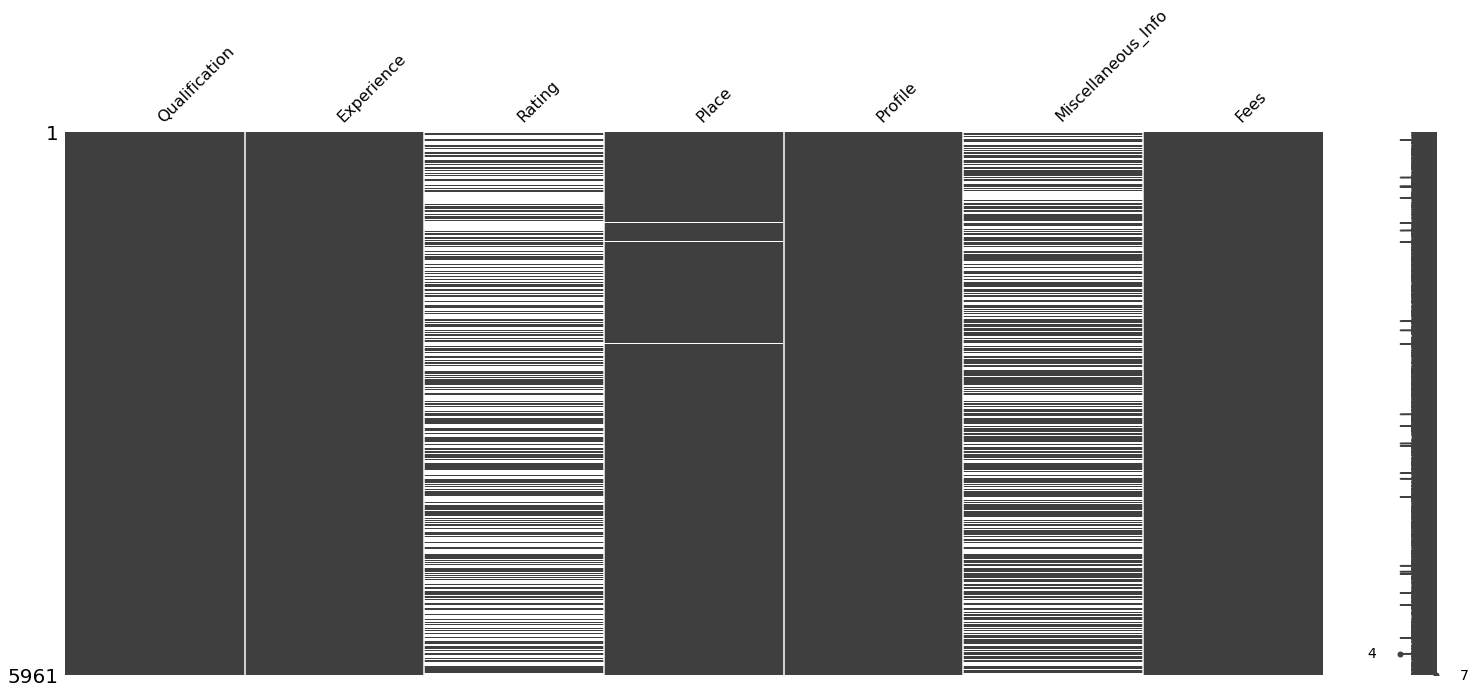

In [7]:
missingno.matrix(df_train);

# Pre-processing 

In [8]:
df_train.Miscellaneous_Info.value_counts()

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth                      40
Tooth Extraction Dental Fillings Scaling / Polishing                                    12
Dental Fillings Zirconia Crowns Dental Implant Fixing                                   12
Skin Disease Treatment Kidney Stone Treatment Gall Bladder (Biliary) Stone Treatment     9
Skin Allergy Treatment Skin Allergies Dermabrasion                                       9
                                                                                        ..
Crowns and Bridges Fixing Artificial Teeth Conservative Dentistry                        1
100% 3 Feedback Lajpat Nagar III, Delhi                                                  1
97% 8 Feedback Gandhi Nagar, Delhi                                                       1
92% 32 Feedback Sultanpur, Delhi                                                         1
96% 1 Feedback Old Rajendra Nagar, Delhi                                                 1

In [9]:
#Lets fill the non null values as 1 and others as 0
for i in df_train['Miscellaneous_Info'].value_counts().index:
    df_train['Miscellaneous_Info'].replace(i, int(1), inplace = True)
    df_train['Miscellaneous_Info'].fillna(int(0), inplace = True)
    
for i in df_test['Miscellaneous_Info'].value_counts().index:
    df_test['Miscellaneous_Info'].replace(i, int(1), inplace = True)
    df_test['Miscellaneous_Info'].fillna(int(0), inplace = True)

In [10]:
df_train.Miscellaneous_Info.value_counts()

1    3341
0    2620
Name: Miscellaneous_Info, dtype: int64

### Experience

In [11]:
# Lets remove the text and keep the numbers alone
for i in df_train['Experience'].value_counts().index:
    g = i.split()
    df_train['Experience'].replace(i, int(g[0]), inplace = True)
for i in df_test['Experience'].value_counts().index:
    g = i.split()
    df_test['Experience'].replace(i, int(g[0]), inplace = True)    

In [12]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,1,100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,1,350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,0,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,1,250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,1,250


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int64 
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  5961 non-null   int64 
 6   Fees                5961 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 326.1+ KB


## Place

In [14]:
# first filling the null values
df_train['Place'].fillna('None,None', inplace = True)
df_test['Place'].fillna('None,None', inplace = True)

In [15]:
# Lets split the place as City and area into two columns
df_train['Area'] = df_train['Place'].str.rsplit(',',1).str.get(0)
df_train['City'] = df_train['Place'].str.rsplit(',',1).str.get(1)

df_test['Area'] = df_test['Place'].str.rsplit(',',1).str.get(0)
df_test['City'] = df_test['Place'].str.rsplit(',',1).str.get(1)


In [16]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,1,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,1,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,1,250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,1,250,Keelkattalai,Chennai


In [17]:
df_train.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                     0
Area                     0
City                     1
dtype: int64

In [18]:
df_test.isna().sum()

Qualification            0
Experience               0
Rating                1090
Place                    0
Profile                  0
Miscellaneous_Info       0
Area                     0
City                     0
dtype: int64

In [19]:
# We have one null value in train dataset city
df_train['City'].fillna('None', inplace = True)
df_train.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                    0
Profile                  0
Miscellaneous_Info       0
Fees                     0
Area                     0
City                     0
dtype: int64

In [20]:
#Now lets drop the feature place
df_train.drop('Place',axis = 1,  inplace =True)
df_test.drop('Place',axis= 1, inplace = True)

In [21]:
df_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100%,Homeopath,1,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Ayurveda,1,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,1,250,Bannerghatta Road,Bangalore
4,BAMS,20,100%,Ayurveda,1,250,Keelkattalai,Chennai


## Rating

In [22]:
df_train['Rating'] = df_train['Rating'].str.rstrip('%')
df_test['Rating'] = df_test['Rating'].str.rstrip('%')

In [23]:
df_train['Rating'].fillna(int(0), inplace = True)
df_test['Rating'].fillna(int(0), inplace = True)

In [24]:
df_train['Rating'] = df_train.Rating.astype('int64')
df_test['Rating'] = df_test.Rating.astype('int64')

In [25]:
df_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24,100,Homeopath,1,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,1,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,0,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,1,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,1,250,Keelkattalai,Chennai


## Qualification

In [26]:
df_train.Qualification.value_counts()

BDS                                                                                              488
BHMS                                                                                             477
BAMS                                                                                             471
MBBS                                                                                             334
MBBS, MS - ENT                                                                                   220
                                                                                                ... 
BAMS, Fellowship in Cardiac Rehabilitation                                                         1
BDS, MDS - Oral & Maxillofacial Surgery, FFDRCSI                                                   1
MD - Dermatology, Diploma in Dermatology, MBBS                                                     1
MD - General Medicine, DM - Critical Care Medicine, Post Graduate Course in Diabetology, MB

In [27]:
le = LabelEncoder()
df_train['Qualification'] = le.fit_transform(df_train['Qualification'])
df_test['Qualification'] = le.fit_transform(df_test['Qualification'])

## Exploratory Data analysis

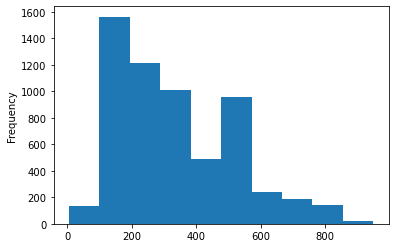

In [28]:
df_train['Fees'].plot.hist();

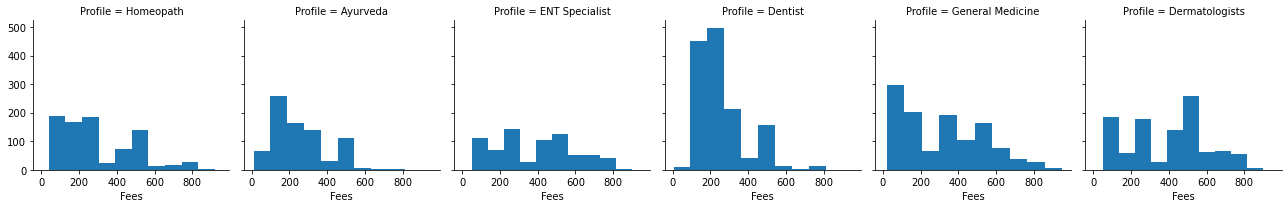

In [29]:
p = sns.FacetGrid(df_train, col = 'Profile')
p.map(plt.hist, 'Fees');

* Dermatologist are getting high fee '800' when compared to other profile
* General medicine is getting low fee '100' more when compared to other profiles

<Figure size 1080x360 with 0 Axes>

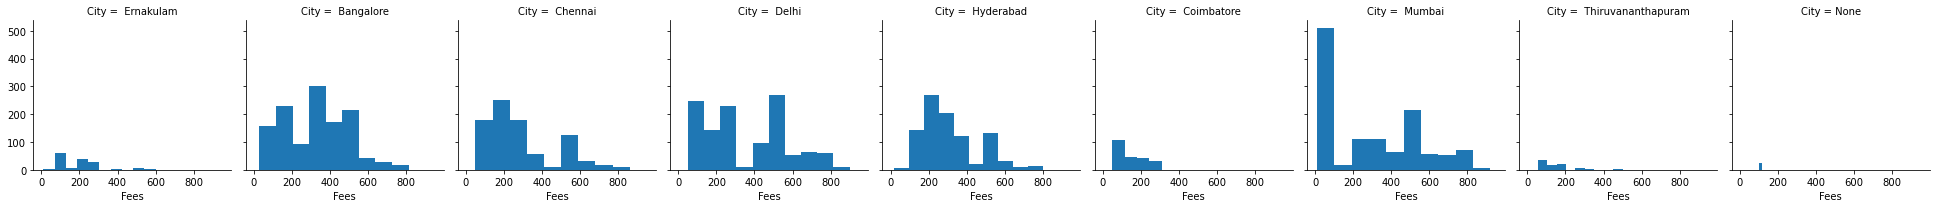

In [30]:
plt.figure(figsize = (15, 5));
c = sns.FacetGrid(df_train, col = 'City')
c.map(plt.hist, 'Fees');

* capital cities are present in large number in our dataset comparing to other cities

## Experience vs fees

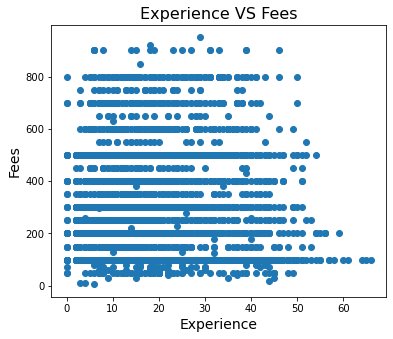

In [31]:
plt.figure(figsize  = (6, 5))
plt.scatter(df_train['Experience'], df_train['Fees'])
plt.title('Experience VS Fees', fontsize = 16)
plt.xlabel('Experience', fontsize = 14)
plt.ylabel('Fees', fontsize = 14);

## Rating vs fees

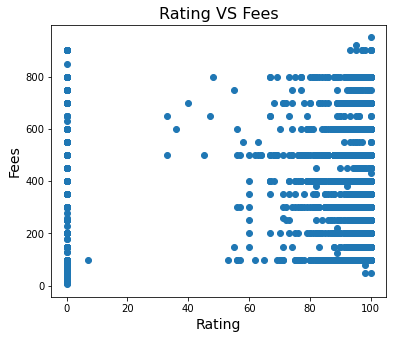

In [32]:
plt.figure(figsize  = (6, 5))
plt.scatter(df_train['Rating'], df_train['Fees'])
plt.title('Rating VS Fees', fontsize = 16)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Fees', fontsize = 14);

                       Fees
City                       
 Bangalore           413684
 Chennai             242480
 Coimbatore           35180
 Delhi               430050
 Ernakulam            28830
 Hyderabad           292440
 Mumbai              375809
 Thiruvananthapuram   14385
None                   2800


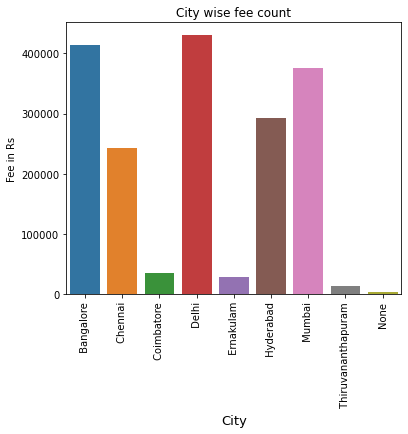

In [33]:
plt.figure(figsize = (6, 5))
city_wise = pd.DataFrame(data =df_train.groupby('City')['Fees'].sum() )
sns.barplot(x= city_wise.index, y = city_wise['Fees'])
plt.title('City wise fee count')
plt.xlabel('City', fontsize = 13)
plt.ylabel('Fee in Rs')
plt.xticks(rotation = 90);
print(city_wise)

* Delhi is top in getting fees in our dataset

## profile VS Fees

                    Fees
Profile                 
Ayurveda          187829
Dentist           332765
Dermatologists    406500
ENT Specialist    281970
General Medicine  368215
Homeopath         258379


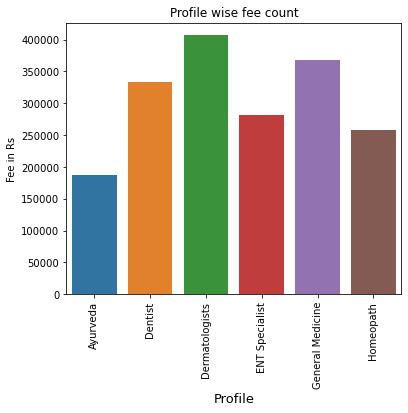

In [34]:
plt.figure(figsize = (6, 5))
Profile_wise = pd.DataFrame(data =df_train.groupby('Profile')['Fees'].sum() )
sns.barplot(x= Profile_wise.index, y = Profile_wise['Fees'])
plt.title('Profile wise fee count')
plt.xlabel('Profile', fontsize = 13)
plt.ylabel('Fee in Rs')
plt.xticks(rotation = 90);
print(Profile_wise)

* Dermatologists are ranking  top in our dataset

## converting categorical features into numerical

In [68]:
for labels , values in df_train.items():
    if not pd.api.types.is_numeric_dtype(labels):
        df_train[labels] = le.fit_transform(df_train[labels])

        
for labels , values in df_test.items():
    if not pd.api.types.is_numeric_dtype(labels):
        df_test[labels] = le.fit_transform(df_test[labels])        

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


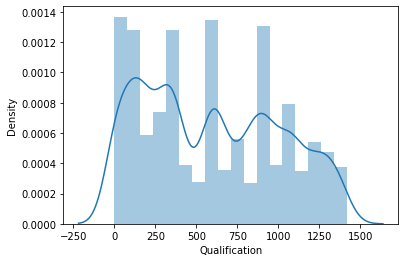

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


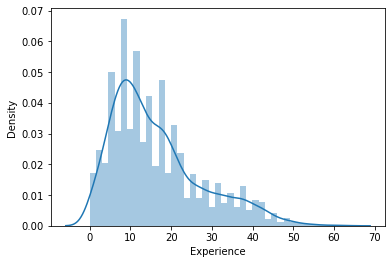

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


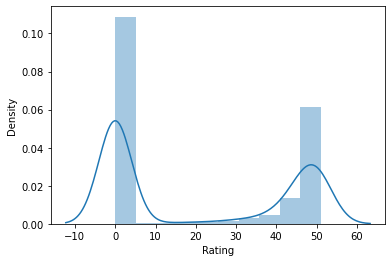

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


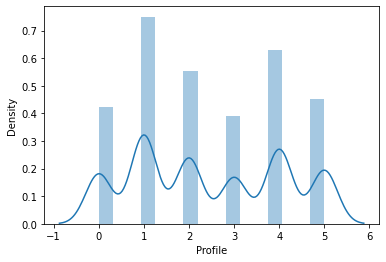

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


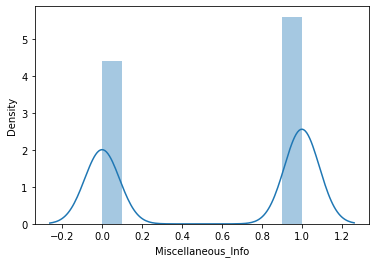

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


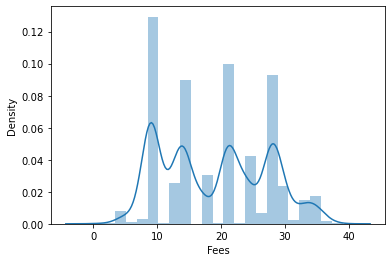

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


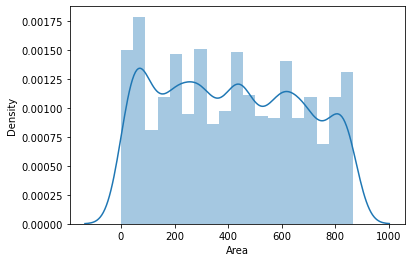

C:\Users\mussa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


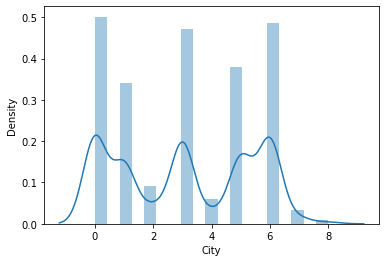

In [40]:
for col in df_train.columns:
    sns.distplot(df_train[col])
    plt.show()

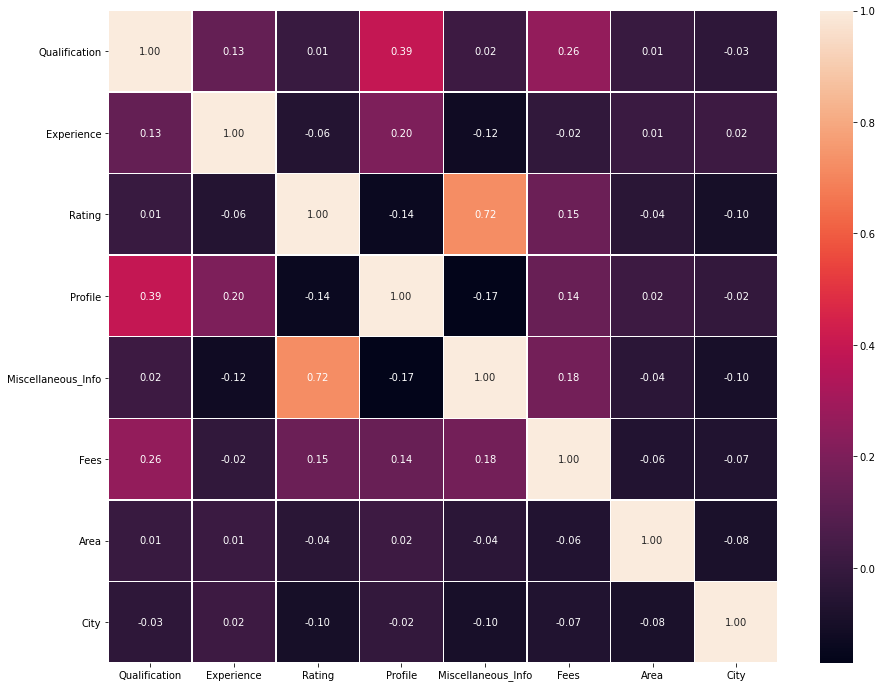

In [39]:
plt.figure(figsize = (15, 12))
sns.heatmap(df_train.corr(),
           annot = True,
           linewidth = .5,
           fmt = '.2f');

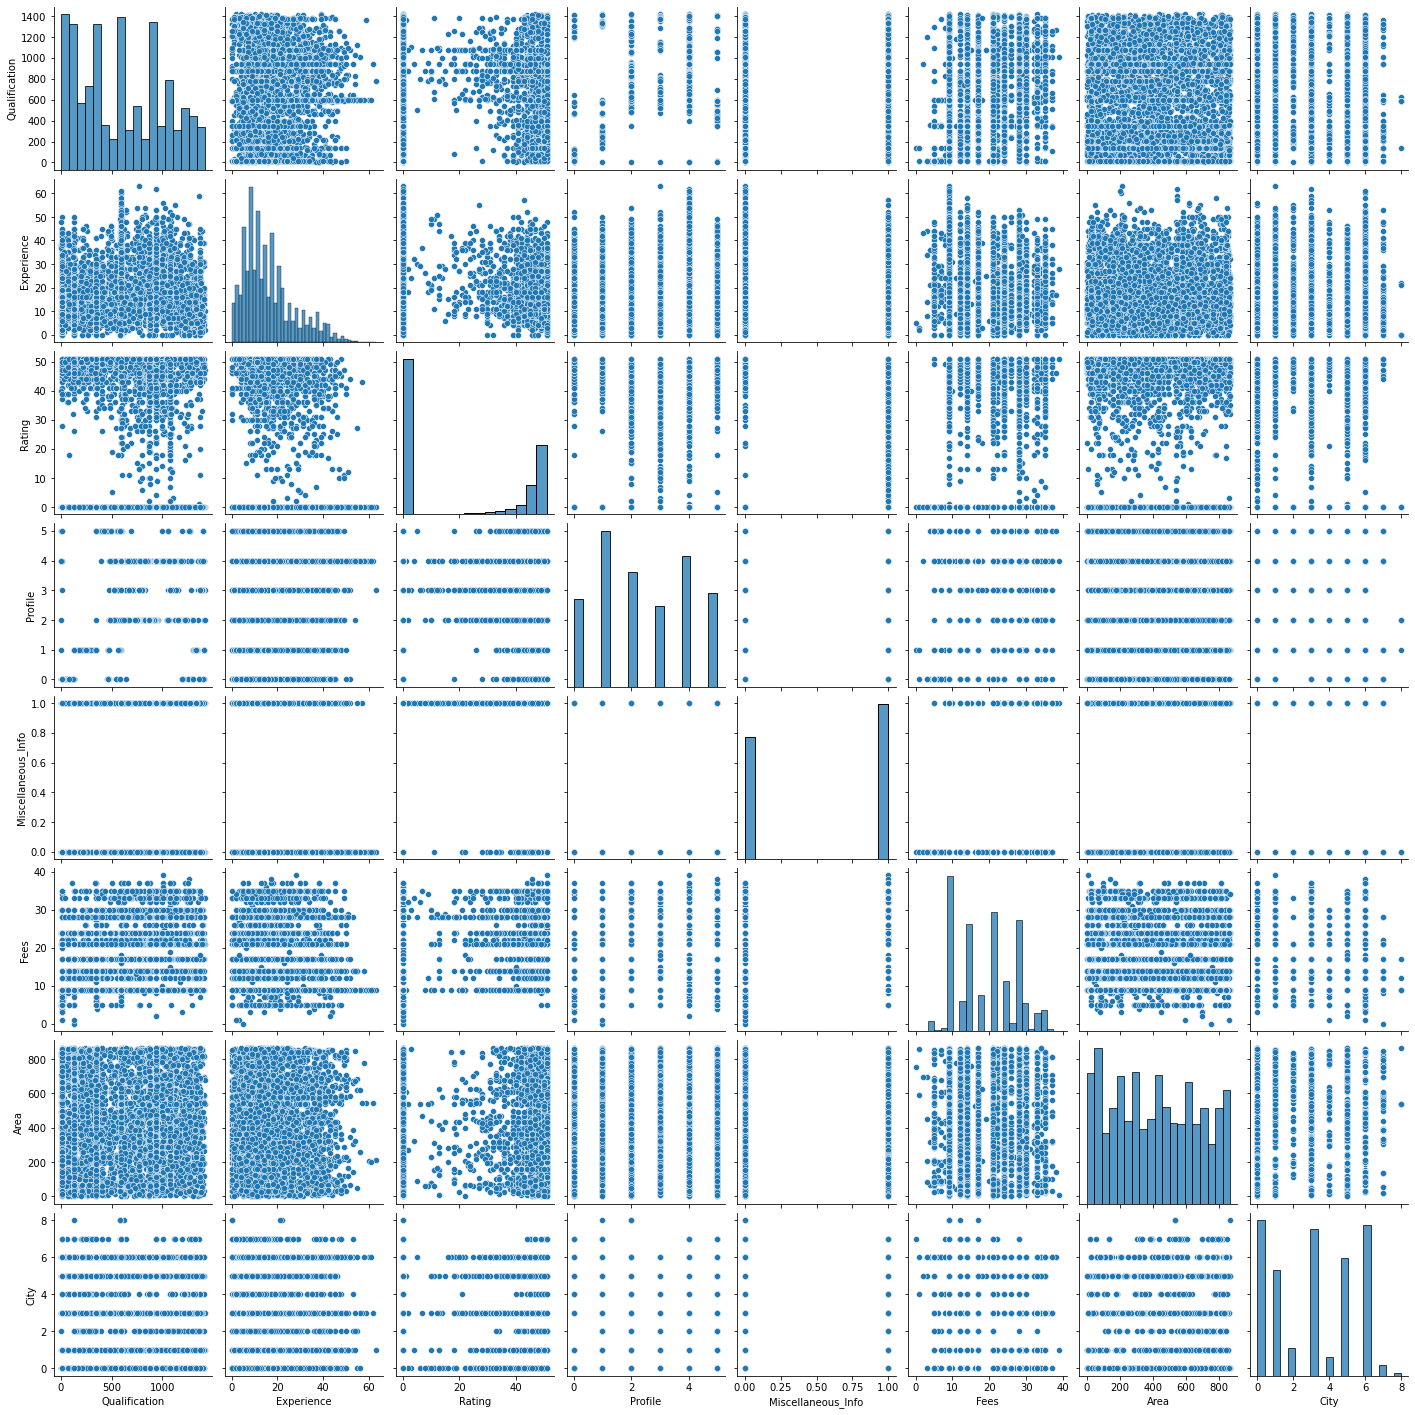

In [41]:
sns.pairplot(df_train);

## Splitting the data

In [42]:
X = df_train.drop('Fees', axis =1)
y = df_train['Fees']

## Checking the skewness

In [45]:
X.skew()

Qualification         0.239720
Experience            0.998674
Rating                0.312686
Profile               0.108803
Miscellaneous_Info   -0.243756
Area                  0.107160
City                  0.010640
dtype: float64

In [46]:
sd = StandardScaler()
X_new = sd.fit_transform(X)

In [47]:
X_train, X_valid, y_train, y_valid = train_test_split(X_new,
                                                     y,
                                                     test_size = 0.2)

In [53]:
models = [LinearRegression(), Lasso(), Ridge(), SVR(), RandomForestRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), XGBRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(model)
    print(model.score(X_new, y))
    print('MAE :', mean_absolute_error(y_valid, y_pred))
    print('MSE :', mean_squared_error(y_valid, y_pred))
    print('RMSE :', np.sqrt(mean_squared_error(y_valid, y_pred)))
    print('\n')

LinearRegression()
0.11175914445664048
MAE : 6.634849345250546
MSE : 60.9412297805171
RMSE : 7.806486391489906


Lasso()
0.06930457086532915
MAE : 6.947071137494925
MSE : 63.01521057925286
RMSE : 7.938212051794337


Ridge()
0.11175979638962685
MAE : 6.634892234037443
MSE : 60.94101062672267
RMSE : 7.806472354829848


SVR()
0.1528502286663712
MAE : 6.2081380515501445
MSE : 59.859396411999015
RMSE : 7.7368854464829075


RandomForestRegressor()
0.7523090227706067
MAE : 5.797475911068535
MSE : 52.805666342601306
RMSE : 7.266750741741546


DecisionTreeRegressor()
0.7088711878703466
MAE : 7.231349538977368
MSE : 96.81014249790444
RMSE : 9.839214526470313


AdaBoostRegressor()
0.16667433528829612
MAE : 6.459606936040001
MSE : 57.368435235522576
RMSE : 7.574195352347507


GradientBoostingRegressor()
0.2834140280604921
MAE : 5.984117490210381
MSE : 53.290985816253006
RMSE : 7.300067521348895


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, c

In [62]:
cv =KFold(n_splits = 5)
params = {'n_estimators' : [100, 200, 300, 400, 500],
         'max_features': ['auto', 'sqrt', 'log2'],
         'min_samples_split': np.linspace(0.1, 1.0, 10),
         'max_depth' : [x for x in range(1, 10)]}

In [63]:
rfr_grid = GridSearchCV(RandomForestRegressor(n_jobs = -1),
                       param_grid = params,
                       cv = cv,
                       verbose = True,
                       scoring = 'neg_mean_squared_error')
rfr_grid.fit(X_train, y_train)
y_pred_rfr = rfr_grid.predict(X_valid)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6750 out of 6750 | elapsed: 30.4min finished


# Metrics

In [64]:
print('Mean Absolute Error :', mean_absolute_error(y_valid, y_pred_rfr))

Mean Absolute Error : 6.295847567291262


In [65]:
print('Mean Squared Error :', mean_squared_error(y_valid, y_pred_rfr))

Mean Squared Error : 57.07978090972057


In [66]:
print('Root mean squared error :', np.sqrt(mean_squared_error(y_valid, y_pred_rfr)))

Root mean squared error : 7.555116207558992


# Testing on test data

In [69]:
df_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Area,City
0,241,34,0,4,0,142,6
1,340,30,0,3,0,578,5
2,258,39,9,2,1,212,1
3,6,0,0,0,0,373,3
4,79,15,36,1,1,231,0


In [75]:
predict = rfr_grid.predict(df_test)
predictions = pd.DataFrame(predict)
predictions.to_csv('Predictions.csv')

# Saving model

In [76]:
import joblib
joblib.dump(rfr_grid, 'Consultationfee.pkl')

['Consultationfee.pkl']